# Proyek Analisis Data: E-Commerce Public Dataset
- Nama: Hannura Hosea
- Email: hannurahosea777@gmail.com
- Id Dicoding: hannura_hosea

## Menentukan Pertanyaan Bisnis

- Produk apa yang paling banyak terjual?
- Lokasi mana yang memiliki paling banyak pelanggan?

## Menyiapkan semua library yang dibutuhkan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from scipy import stats
import urllib

## **1. Data Wrangling**

### 1.1 Gathering Data

In [3]:
#lokasi data yang akan diolah
mydata_dir = 'drive/MyDrive/E-Commerce Public Dataset/'

# membuka data
customers_df = pd.read_csv(mydata_dir + "customers_dataset.csv")
geolocation_df = pd.read_csv(mydata_dir + "geolocation_dataset.csv")
order_items_df = pd.read_csv(mydata_dir + "order_items_dataset.csv")
order_payments_df = pd.read_csv(mydata_dir + "order_payments_dataset.csv")
order_reviews_df = pd.read_csv(mydata_dir + "order_reviews_dataset.csv")
orders_df = pd.read_csv(mydata_dir + "orders_dataset.csv")
product_category_name_df = pd.read_csv(mydata_dir + "product_category_name_translation.csv")
products_df = pd.read_csv(mydata_dir + "products_dataset.csv")
sellers_df = pd.read_csv(mydata_dir + "sellers_dataset.csv")

data = {'customers': customers_df,
      'location': geolocation_df,
      'items': order_items_df,
      'payments': order_payments_df,
      'reviews': order_reviews_df,
      'orders': orders_df,
      'category': product_category_name_df,
      'products': products_df,
      'sellers': sellers_df}

In [4]:
#melihat data customer
data['customers'].head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
#melihat data location
data['location'].head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [6]:
#melihat data items
data['items'].head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [7]:
#melihat data payments
data['payments'].head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [8]:
#melihat data reviews
data['reviews'].head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [9]:
#melihat data orders
data['orders'].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [10]:
#melihat data category
data['category'].head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [11]:
#melihat data products
data['products'].head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [12]:
#melihat data sellers
data['sellers'].head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### 1.2 Assessing Data

#### 1.2.1 Cek Data Type

In [13]:
for df_name, df in data.items():
  print('\n', data[df_name].info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB

 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non

In [14]:
#Memperbaiki tipe data orders

datetime_orders = ["order_purchase_timestamp","order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date"]
for column in datetime_orders:
  data['orders'][column] = pd.to_datetime(data['orders'][column])

#Memperbaiki tipe data items
datetime_items = ["shipping_limit_date"]

for column in datetime_items:
  data['items'][column] = pd.to_datetime(data['items'][column])

#Memperbaiki tipe data reviews
datetime_reviews = ["review_creation_date","review_answer_timestamp"]

for column in datetime_reviews:
  data['reviews'][column] = pd.to_datetime(data['reviews'][column])

#### 1.2.2 Cek Data Duplikat

In [15]:
jumlah_data = {}
duplikat = {}

for df_name, df in data.items():
  jumlah_data[df_name] = len(df) #menghitung keseluruhan jumlah data
  duplikat[df_name] = df.duplicated().sum() #menghitung data yang duplikat

jumlah_data_df = pd.DataFrame.from_dict(jumlah_data, orient='index', columns=['Jumlah Data'])
duplikat_df = pd.DataFrame.from_dict(duplikat, orient='index', columns=['Data Duplikat'])

pd.concat([jumlah_data_df, duplikat_df], axis=1)



,Jumlah Data,Data Duplikat
customers,99441,0
location,1000163,261831
items,112650,0
payments,103886,0
reviews,99224,0
orders,99441,0
category,71,0
products,32951,0
sellers,3095,0


#### 1.2.3 Cek Missing Value

In [16]:
jumlah_null = {}

for df_name, df in data.items():
  jumlah_null[df_name] = df.isnull().sum()
  print(df_name, '\n', jumlah_null[df_name], '\n')

customers 
 customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64 

location 
 geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64 

items 
 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64 

payments 
 order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64 

reviews 
 review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64 

orders 
 order_id     

### 1.3 Cleaning Data

1.3.1 location

In [17]:
#hapus data yang duplikat
data['location'].drop_duplicates(inplace=True)

1.3.2 reviews

In [18]:
# data pada column title banyak yang kosong, sehingga dapat dihapus karena tidak dibutuhkan pada analisis saat ini
# data pada column message juga tidak dibutuhkan pada analisis saat ini, tapi pada nilai yang kosong dapat diganti 0 dan terisi 1 apabila selanjutnya ingin menganalisis jumlah feedback

data['reviews'].drop(['review_comment_title'], axis=1, inplace= True)
data['reviews']['review_comment_message'] = np.where(data['reviews']['review_comment_message'].isnull(), 0, 1)

1.3.3 orders

In [19]:
#data pesanan yang sudah terantar atau delivered saja yang akan digunakan pada analisis

delivered = data['orders']['order_id'][data['orders']['order_status'] != 'delivered'].values
for key, value in data.items():
    if 'order_id' in value.columns:
        value.drop(value.loc[value['order_id'].isin(delivered)].index, inplace = True)


1.3.4 products

In [20]:
# drop column yang tidak dibutuhkan dalam analisis
# mengisi product_category_name missing value dengan other

products_drop_column = ['product_name_lenght',
                        'product_description_lenght',
                        'product_photos_qty',
                        'product_weight_g',
                        'product_length_cm',
                        'product_height_cm',
                        'product_width_cm']

data['products'].drop(products_drop_column, axis= 1, inplace= True)

data['products']['product_category_name'].fillna(value='other', inplace=True)

## **2. Exploratory Data Analysis (EDA)**

### 2.1 Explore customers


In [21]:
data['customers'].head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [22]:
# Jumlah Customer tiap Kota (City)
data['customers'].groupby(by="customer_city").customer_id.nunique().sort_values(ascending= False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

In [23]:
# Jumlah Costemer tiap negara bagian (State)
data['customers'].groupby(by="customer_state").customer_id.nunique().sort_values(ascending= False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

### 2.2 Explore location

In [24]:
data['location'].head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [25]:
data['location'].groupby(by="geolocation_zip_code_prefix").size().sort_values(ascending= False)

geolocation_zip_code_prefix
38400    779
35500    751
11680    727
11740    678
36400    627
        ... 
40024      1
39999      1
39955      1
39931      1
39888      1
Length: 19015, dtype: int64

### 2.3 Explore Items, Product, & Category

In [26]:
#Merge Product & Category
product_category_df = pd.merge(
    left=data['products'],
    right=data['category'],
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
product_category_df.head()

,product_id,product_category_name,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,housewares


In [27]:
#Merge Product_Category & Items
items_product_category_df = pd.merge(
    left=data['items'],
    right= product_category_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
items_product_category_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,garden_tools


In [28]:
items_product_category_df.groupby(by='product_category_name_english').order_id.nunique().sort_values(ascending=False)

product_category_name_english
bed_bath_table               9272
health_beauty                8647
sports_leisure               7530
computers_accessories        6530
furniture_decor              6307
                             ... 
arts_and_craftmanship          23
la_cuisine                     13
cds_dvds_musicals              12
fashion_childrens_clothes       7
security_and_services           2
Name: order_id, Length: 71, dtype: int64

Produk yang menjadi banyak di order adalah bed_bath_table

### 2.4 Explore sellers, Items, Product, & Category

In [29]:
data['sellers'].head()


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [30]:
data['sellers'].groupby(by='seller_city').seller_id.nunique().sort_values(ascending=False)

seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
                 ... 
ivoti               1
itirapina           1
itau de minas       1
itapui              1
xaxim               1
Name: seller_id, Length: 611, dtype: int64

In [31]:
data['sellers'].groupby(by='seller_state').seller_id.nunique().sort_values(ascending=False)

seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
CE      13
PE       9
PB       6
MS       5
RN       5
MT       4
RO       2
SE       2
AC       1
PI       1
AM       1
MA       1
PA       1
Name: seller_id, dtype: int64

In [32]:
#merge sellers, items, products & Category

sellers_items_product_category_df = pd.merge(
    left=data['sellers'],
    right= items_product_category_df,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
sellers_items_product_category_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,4a90af3e85dd563884e2afeab1091394,1.0,ffb64e34a37740dafb6c88f1abd1fa61,2017-08-25 20:50:19,106.20,9.56,esporte_lazer,sports_leisure
1,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,6d953888a914b67350d5bc4d48f2acab,1.0,f4621f8ad6f54a2e3c408884068be46d,2017-05-11 16:25:11,101.70,15.92,esporte_lazer,sports_leisure
2,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,bc8a5de6abf5b14f98a6135a7fb46731,2.0,325a06bcce0da45b7f4ecf2797dd40e4,2017-09-05 12:50:19,10.80,2.42,esporte_lazer,sports_leisure
3,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,035201c3c82a97f8a25dd6bd5244b2d5,1.0,1c36a5285f7f3b1ed2637d7c528ce5ff,2017-11-22 04:30:29,89.99,45.09,malas_acessorios,luggage_accessories
4,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,0504447548229e075dea8441b37b1e2a,1.0,8852eb03b04ec3268a66e9b696e25f6f,2017-10-06 02:14:42,199.90,21.89,papelaria,stationery


In [33]:
sellers_items_product_category_df.groupby(by='seller_city').order_id.nunique().sort_values(ascending=False)

seller_city
sao paulo         24039
ibitinga           6450
curitiba           2671
santo andre        2634
belo horizonte     2347
                  ...  
divisa nova           0
sbc                   0
eusebio               0
marapoama             0
04482255              0
Name: order_id, Length: 611, dtype: int64

### 2.5 Explore Customers, Orders, Payments, Reviews & Location

In [34]:
customers_df = pd.merge(
    left=data['customers'],
    right=data['orders'],
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
customers_df.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


In [35]:
customers_df.groupby(by='customer_city').order_id.nunique().sort_values(ascending=False)

customer_city
sao paulo                 15045
rio de janeiro             6601
belo horizonte             2697
brasilia                   2071
curitiba                   1489
                          ...  
santo antonio de goias        0
baguari                       0
alto bela vista               0
caetanos                      0
jataizinho                    0
Name: order_id, Length: 4119, dtype: int64

In [36]:
customers_payments_df = pd.merge(
    left=customers_df,
    right=data['payments'],
    how="left",
    left_on="order_id",
    right_on="order_id"
)
customers_payments_df.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1.0,credit_card,2.0,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1.0,credit_card,8.0,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1.0,credit_card,7.0,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1.0,credit_card,1.0,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1.0,credit_card,8.0,252.25


In [37]:
customers_payments_df.groupby(by='customer_city').agg({
    'payment_value': 'sum'
}).sort_values(by='payment_value', ascending=False)

,payment_value
customer_city,
sao paulo,2108162.22
rio de janeiro,1111872.32
belo horizonte,406050.87
brasilia,345221.87
curitiba,238582.26
...,...
apiacas,0.00
boquim,0.00
jataizinho,0.00


In [38]:
customers_payments_df.groupby(by='customer_state').agg({
    'payment_value': 'sum'
}).sort_values(by='payment_value', ascending=False)

,payment_value
customer_state,
SP,5770266.19
RJ,2055690.45
MG,1819277.61
RS,861802.40
PR,781919.55
SC,595208.40
BA,591270.60
DF,346146.17
GO,334294.22


In [39]:
customers_payments_reviews_df = pd.merge(
    left=customers_payments_df,
    right=data['reviews'],
    how="left",
    left_on="order_id",
    right_on="order_id"
)
customers_payments_reviews_df.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,2017-06-05,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,0.0,2017-05-26,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,2018-02-06,1.0,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,0.0,2018-01-30,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,2018-06-13,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0,0.0,2018-06-15,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,2018-04-10,1.0,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,0.0,2018-03-29,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,2018-08-15,1.0,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,1.0,2018-08-10,2018-08-17 01:59:52


### 2.6 ALL Explore

In [42]:
all_df = pd.merge(
    left=customers_payments_reviews_df,
    right=sellers_items_product_category_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_df.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,seller_zip_code_prefix,seller_city,seller_state,order_item_id,product_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,8577,itaquaquecetuba,SP,1.0,a9516a079e37a9c9c36b9b78b10169e8,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,office_furniture
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,88303,itajai,SC,1.0,4aa6014eceb682077f9dc4bffebc05b0,2018-01-18 20:58:32,289.00,46.48,utilidades_domesticas,housewares
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,8577,itaquaquecetuba,SP,1.0,bd07b66896d6f1494f5b86251848ced7,2018-06-05 16:19:10,139.94,17.79,moveis_escritorio,office_furniture
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,8577,itaquaquecetuba,SP,1.0,a5647c44af977b148e0a3a4751a09e2e,2018-03-27 16:31:16,149.94,23.36,moveis_escritorio,office_furniture
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,14940,ibitinga,SP,1.0,9391a573abe00141c56e38d84d7d5b3b,2018-07-31 10:10:09,230.00,22.25,casa_conforto,home_confort


In [43]:
#rata-rata review score setiap produk yang dijual
all_df.groupby(by='product_category_name_english').agg({
    'review_score': ['mean']
})

,review_score
,mean
product_category_name_english,
agro_industry_and_commerce,4.227642
air_conditioning,4.051903
art,4.073171
arts_and_craftmanship,4.125000
audio,3.845333
...,...
stationery,4.235823
tablets_printing_image,4.117647


Save all_df, customers dan location to .csv

In [58]:
output_csv = "drive/MyDrive/all_df.csv"
output_location = "drive/MyDrive/location_df.csv"
output_customers = "drive/MyDrive/customers_df.csv"
all_df.to_csv(output_csv, index=False)
data['location'].to_csv(output_location, index=False)
data['customers'].to_csv(output_customers, index=False)

## **3.Visualization & Explanatory Analysis**

### Pertanyaan 1: - Produk apa yang paling banyak dan sedikit terjual?

In [52]:
sum_order = all_df.groupby(by='product_category_name_english').order_id.nunique().sort_values(ascending=False).reset_index()

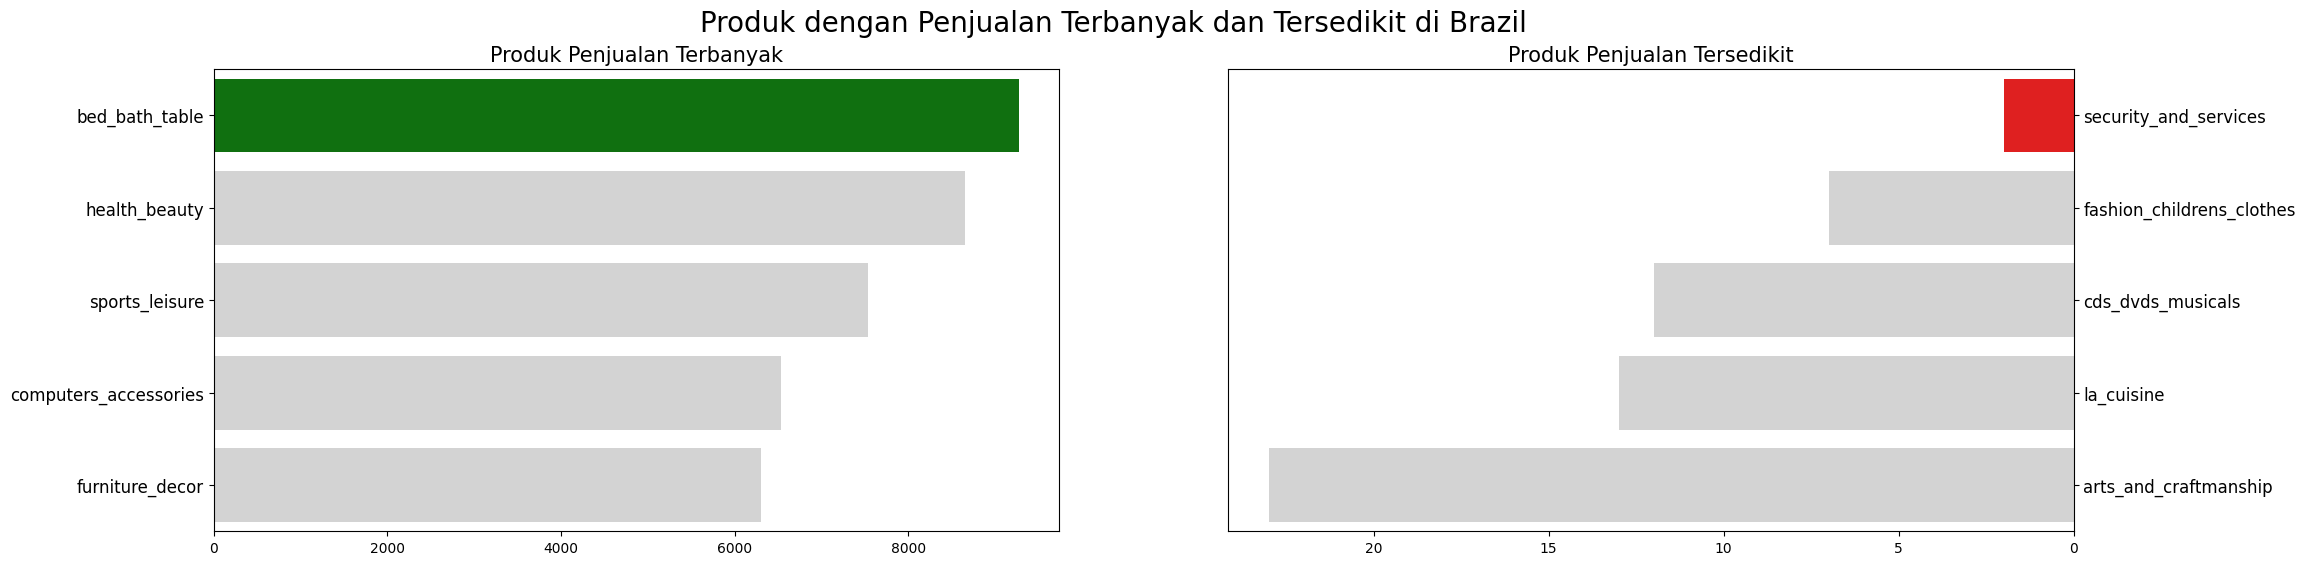

In [55]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#008000", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
colors1 = ["#FF0000", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="order_id", y="product_category_name_english", data=sum_order.sort_values(by="order_id", ascending=False).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Produk Penjualan Terbanyak", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)
sns.barplot(x="order_id", y="product_category_name_english", data=sum_order.sort_values(by="order_id", ascending=True).head(5), palette=colors1, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Produk Penjualan Tersedikit", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Produk dengan Penjualan Terbanyak dan Tersedikit di Brazil", fontsize=20)
plt.show()

### Pertanyaan 2: - Lokasi mana yang memiliki paling banyak pelanggan?

In [47]:
all_df.groupby(by='customer_city').order_id.nunique().sort_values(ascending=False)

customer_city
sao paulo                 15045
rio de janeiro             6601
belo horizonte             2697
brasilia                   2071
curitiba                   1489
                          ...  
santo antonio de goias        0
baguari                       0
alto bela vista               0
caetanos                      0
jataizinho                    0
Name: order_id, Length: 4119, dtype: int64

In [48]:
all_df.groupby(by='customer_state').order_id.nunique().sort_values(ascending=False)

customer_state
SP    40501
RJ    12350
MG    11354
RS     5345
PR     4923
SC     3546
BA     3256
DF     2080
ES     1995
GO     1957
PE     1593
CE     1279
PA      946
MT      886
MA      717
MS      701
PB      517
PI      476
RN      474
AL      397
SE      335
TO      274
RO      243
AM      145
AC       80
AP       67
RR       41
Name: order_id, dtype: int64

In [49]:
all_location_df = pd.merge(
    left=data['customers'],
    right=data['location'],
    how="left",
    left_on="customer_zip_code_prefix",
    right_on="geolocation_zip_code_prefix"
)
all_location_df.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409.0,-20.509897,-47.397866,franca,SP
1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409.0,-20.497396,-47.399241,franca,SP
2,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409.0,-20.510459,-47.399553,franca,SP
3,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409.0,-20.480940,-47.394161,franca,SP
4,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409.0,-20.515413,-47.398194,franca,SP


In [59]:
output_location = "drive/MyDrive/location_df.csv"
all_df.to_csv(output_csv, index=False)
all_location_df.to_csv(output_location, index=False)

geoanalisis untuk melihat di daerah brazil bagian mana penjualan paling banyak

In [50]:
def plot_brazil(data):
    brazil = mpimg.imread(urllib.request.urlopen('https://i.pinimg.com/originals/3a/0c/e1/3a0ce18b3c842748c255bc0aa445ad41.jpg'),'jpg')
    ax = data.plot(kind="scatter", x="geolocation_lng", y="geolocation_lat", figsize=(10,10), alpha=0.5,s=0.5,c='blue')
    plt.axis('off')
    plt.imshow(brazil, extent=[-73.98283055, -33.8,-33.75116944,5.4])
    plt.show()


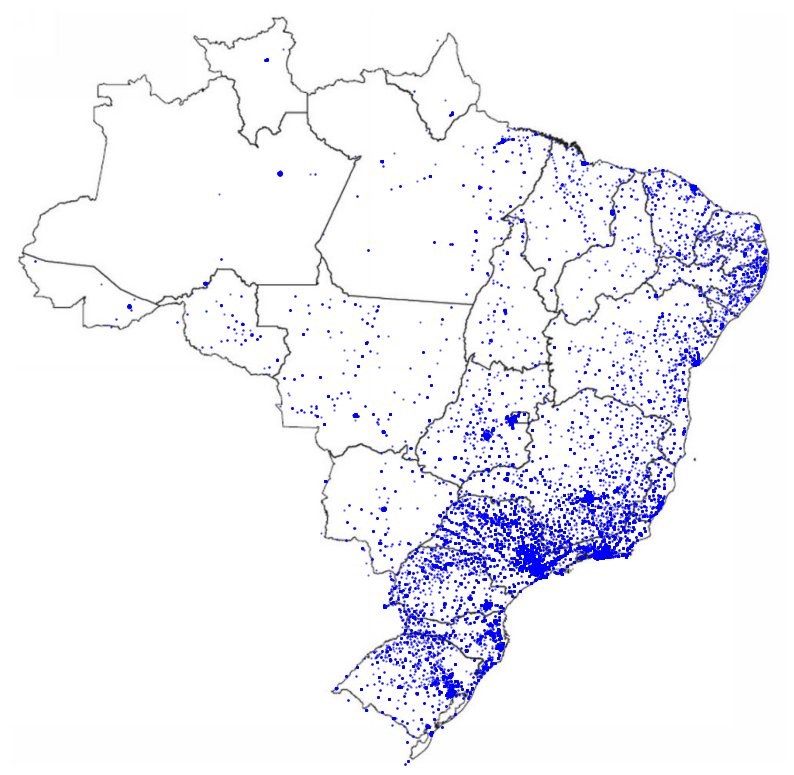

In [51]:
plot_brazil(all_location_df.drop_duplicates(subset='customer_unique_id'))

## **4. Conclusion**

### Pertanyaan 1: - Produk apa yang paling banyak dan sedikit terjual?

Berdasarkan hasil visualisasi data pada gambar diatas. Produk dengan Penjualan terbanyak adalah Bed_bath_table dengan lebih dari 8000 Penjualan, sedangkan untuk Penjualan paling sedikit adalah Security and Services dengan kurang dari lima penjualan

### Pertanyaan 2: - Lokasi mana yang memiliki paling banyak pelanggan?

Lokasi yang memiliki penjualan paling banyak adalah di daerah Brazil bagian selatan